
# IFT3395/6390 Devoirs 1
> Professeur : Aaron Courville
>
> Étudiants: Zhibin.Lu & Xiaocheng.Liu

## 4.Practice : Bayes classifier

1.
Shuffle the Iris dataset ( use numpy.random.shuffle after initiliazing
the random number generator using numpy.random.seed(123) ). Di-
vide the dataset into 2 parts : a training set and a validation set.
Prepare two versions of each of these datasets : one with all d = 4
features, the other one with only the d = 2 first features that we will
only use to visualize (plot) the results of our classier.

In [1]:
import numpy as np
import pylab
iris = np.loadtxt('iris.txt')

np.random.seed(456)
indices1 = np.arange(0,50)
indices2 = np.arange(50,100)
indices3 = np.arange(100,150)

np.random.shuffle(indices1)
np.random.shuffle(indices2)
np.random.shuffle(indices3)

iris_train1 = iris[indices1[:35]]
iris_validation1 = iris[indices1[35:]]
iris_train2 = iris[indices2[:35]]
iris_validation2 = iris[indices2[35:]]
iris_train3 = iris[indices3[:35]]
iris_validation3 = iris[indices3[35:]]

iris_train = np.concatenate([iris_train1, iris_train2, iris_train3])
iris_validation = np.concatenate([iris_validation1, iris_validation2, iris_validation3])

2.

a)Implement the Bayes classier using diagonal Gaussian parametric density functions

In [2]:
#Bayes classier using diagonal Gaussian parametric density functions
# gaussienne diagonale
class gauss_mv:

    def __init__(self,n_dims):
        self.n_dims = n_dims
        self.mu = np.zeros((1,n_dims))
        self.sigma_sq = np.ones(n_dims)

    # Pour un ensemble d'entrainement, la fonction devrait calculer l'estimateur par MV de la moyenne et de la matrice de covariance
    def train(self, train_data):
        self.mu = np.mean(train_data, axis=0)
        self.sigma_sq =  np.sum((train_data - self.mu) ** 2.0, axis = 0) / train_data.shape[0] 
            
    # Retourne un vecteur de taille nb. ex. de test contenant les log
    # probabilités de chaque exemple de test sous le modèle.    
    def compute_predictions(self, test_data):
        # on prend le produit du vecteur représentant la diagonale (np.prod(self.sigma)
        c = -self.n_dims * np.log(2*np.pi)/2.0 - np.log(np.prod(self.sigma_sq))/2.0
        # on somme sur l'axe 1 après avoir divisé par sigma puisque celui ci aussi est
        # de dimension d
        log_prob = c - np.sum((test_data -  self.mu)**2.0/ (2.0 * self.sigma_sq),axis=1)
        return log_prob
    
class classif_bayes:

    def __init__(self,modeles_mv, priors):
        self.modeles_mv = modeles_mv
        self.priors = priors
        if len(self.modeles_mv) != len(self.priors):
            print 'Le nombre de modeles MV doit etre egale au nombre de priors!'
        
        self.n_classes = len(self.modeles_mv)
                                                            
    # Retourne une matrice de taille nb. ex. de test x nombre de classes contenant les log
    # probabilités de chaque exemple de test sous chaque modèle MV. 
    def compute_predictions(self, test_data, eval_by_group=False):
        log_pred = np.empty((test_data.shape[0],self.n_classes))

        for i in range(self.n_classes):
            # ici il va falloir utiliser modeles_mv[i] et priors pour remplir
            # chaque colonne de log_pred (c'est plus efficace de faire tout une
            # colonne a la fois)
            
            log_pred[:,i] = self.modeles_mv[i].compute_predictions(test_data) +  np.log(self.priors[i])

        return log_pred



b)2D visualization. Using only the 2 first features, train your Bayes
classier on the train set ; plot the decision boundary as well as
the training examples and validation examples.

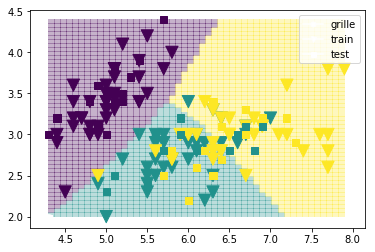

In [3]:
# fonction plot
def gridplot(classifieur,train,test,n_points=50):

    train_test = np.vstack((train,test))
    (min_x1,max_x1) = (min(train_test[:,0]),max(train_test[:,0]))
    (min_x2,max_x2) = (min(train_test[:,1]),max(train_test[:,1]))

    xgrid = np.linspace(min_x1,max_x1,num=n_points)
    ygrid = np.linspace(min_x2,max_x2,num=n_points)
    
	# calcule le produit cartesien entre deux listes
    # et met les resultats dans un array
    thegrid = np.array(combine(xgrid,ygrid))

    les_comptes = classifieur.compute_predictions(thegrid)
    classesPred = np.argmax(les_comptes,axis=1)+1
    
    # La grille
    # Pour que la grille soit plus jolie
    #props = dict( alpha=0.3, edgecolors='none' )
    pylab.pcolormesh(xgrid, ygrid, classesPred.reshape((n_points, n_points)).T, alpha=.3)
    #pylab.scatter(thegrid[:,0],thegrid[:,1],c = classesPred, s=50)
	# Les points d'entrainment
    pylab.scatter(train[:,0], train[:,1], c = train[:,-1], marker = 'v', s=150)
    # Les points de test
    pylab.scatter(test[:,0], test[:,1], c = test[:,-1], marker = 's', s=50)

    ## Un petit hack, parce que la fonctionalite manque a pylab...
    h1, = pylab.plot([min_x1], [min_x2], marker='o', c = 'w',ms=5) 
    h2, = pylab.plot([min_x1], [min_x2], marker='v', c = 'w',ms=5) 
    h3, = pylab.plot([min_x1], [min_x2], marker='s', c = 'w',ms=5) 
    handles = [h1,h2,h3]
    ## fin du hack

    labels = ['grille','train','test']
    pylab.legend(handles,labels)

    pylab.axis('equal')
    pylab.show()

## http://code.activestate.com/recipes/302478/
def combine(*seqin):
    '''returns a list of all combinations of argument sequences.
for example: combine((1,2),(3,4)) returns
[[1, 3], [1, 4], [2, 3], [2, 4]]'''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:],listout,newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    
    return listout

train_cols = [0,1]

# On cree un modele par classe (par maximum de vraissemblance)
model_classe1=gauss_mv(len(train_cols))
model_classe2=gauss_mv(len(train_cols))
model_classe3=gauss_mv(len(train_cols))
model_classe1.train(iris_train1[:,train_cols])
model_classe2.train(iris_train2[:,train_cols])
model_classe3.train(iris_train3[:,train_cols])

# On cree une liste de tous nos modeles
# On fait la meme chose pour les priors
# Les priors sont calcules ici de facon exact car on connait le nombre 
# de representants par classes. Un fois que vous aurez cree un
# ensemble de train/test, il va faloir les calculer de facon exacte
modele_mv=[model_classe1,model_classe2,model_classe3]
priors=[0.3333,0.3333,0.3333]

# On cree notre classifieur avec notre liste de modeles gaussien et nos priors
classifieur=classif_bayes(modele_mv,priors)

#on peut maintenant calculer les logs-probabilites selon nos modeles
log_prob_train=classifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test=classifieur.compute_predictions(iris_validation[:, train_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classesPred_train = log_prob_train.argmax(1)+1
classesPred_test = log_prob_test.argmax(1)+1

gridplot(classifieur,
         iris_train[:, train_cols + [-1]],
         iris_validation[:, train_cols + [-1]],
         n_points=50)

c)Error rate in dimension d = 2 : Compute and print the error rate of your classier (trained on d = 2 features), on the train set and the validation set.

In [4]:
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test==iris_validation[:,-1]).mean())*100.0)

Taux d'erreur (entrainement) 19.05%
Taux d'erreur (test) 26.67%


d)Error rate in dimension d = 4 : Train your classier using all features. Compute and print the error rate on the train set and the validation set.

In [5]:
train_cols = [0,1,2,3]

# On cree un modele par classe (par maximum de vraissemblance)
model_classe1=gauss_mv(len(train_cols))
model_classe2=gauss_mv(len(train_cols))
model_classe3=gauss_mv(len(train_cols))
model_classe1.train(iris_train1[:,train_cols])
model_classe2.train(iris_train2[:,train_cols])
model_classe3.train(iris_train3[:,train_cols])

modele_mv=[model_classe1,model_classe2,model_classe3]
priors=[0.3333,0.3333,0.3333]

# On cree notre classifieur avec notre liste de modeles gaussien et nos priors
classifieur=classif_bayes(modele_mv,priors)

#on peut maintenant calculer les logs-probabilites selon nos modeles
log_prob_train=classifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test=classifieur.compute_predictions(iris_validation[:, train_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classesPred_train = log_prob_train.argmax(1)+1
classesPred_test = log_prob_test.argmax(1)+1


print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test==iris_validation[:,-1]).mean())*100.0)

Taux d'erreur (entrainement) 2.86%
Taux d'erreur (test) 6.67%


3.
a)Implement the Bayes classier using Parzen density functions with isotropic Gaussian kernels

In [6]:
# estimateur Parzen à noyau gaussienne pour classifieur de Parzen
class estimateur_parzen_a_noyau_gauss_pour_bayes:
    
    def __init__(self,n_dims):
        self.n_dims = n_dims

    def train(self, train_data):
        self.train_data=train_data
    
    # Retourne un array dont chaque element est probalite de chaque test_data
    def compute_predictions(self, sigma, test_data):
        # hyper parameter sigma
        self.sigma=sigma
        self.sigma_sq = sigma**2      
        # Initialisation de la matrice à retourner
        pdf=self.pdf_parzenfun(test_data,self.sigma,self.train_data)
        return np.log(pdf) 
    
    # la fonction de probalité de densité de fenetre parzen
    def pdf_parzenfun(self,x,sigma,train_data):
        pdf=np.zeros(x.shape[0])
        d=train_data.shape[1]
        for i in range(x.shape[0]):
            pdf[i] = np.sum(np.exp(-(np.sum((train_data - x[i])**2,axis=1)/(2*sigma**2))) / (sigma**d * np.sqrt((2*np.pi)**d)))/train_data.shape[0]
        return pdf

# classifieur bayes pour Parzen
class classif_bayes_parzen:

    def __init__(self,modeles_mv, priors, sigma):
        self.modeles_mv = modeles_mv
        self.priors = priors
        self.sigma=sigma
        if len(self.modeles_mv) != len(self.priors):
            print 'Le nombre de modeles MV doit etre egale au nombre de priors!'
        
        self.n_classes = len(self.modeles_mv)
                                                            
    # Retourne une matrice de taille nb. ex. de test x nombre de classes contenant les log
    # probabilités de chaque exemple de test sous chaque modèle MV. 
    def compute_predictions(self, test_data, eval_by_group=False):
        log_pred = np.empty((test_data.shape[0],self.n_classes))

        for i in range(self.n_classes):
            # ici il va falloir utiliser modeles_mv[i] et priors pour remplir
            # chaque colonne de log_pred (c'est plus efficace de faire tout une
            # colonne a la fois)
            
            log_pred[:,i] = self.modeles_mv[i].compute_predictions(self.sigma,test_data) +  np.log(self.priors[i])

        return log_pred


# estimateur parzen à noyau gaussienne multivariee isotropique
# il marche tout seul, pas besoin de classifieur bayes
class classif_parzen_a_noyau_gauss_mv_isotropique:
    
    def __init__(self,n_dims,sigma):
        self.n_dims = n_dims
        # hyper parameter sigma
        self.sigma=sigma
        self.sigma_sq = sigma**2

    def train(self, train_data,train_data_class):
        self.train_data=train_data
        self.train_data_class=train_data_class
        self.n_classes=np.unique(train_data_class).shape[0]
        
    # calculer tous les train_data pour une point de test
    def poids_gauss_mv_isotropique(self,ex):        
        #c = -self.n_dims * np.log(2*np.pi)/2.0 - self.n_dims*np.log(self.sigma_sq)/2.0
        #log_poids = c - np.sum((self.train_data -  ex)**2.0,axis=1) / (2.0 * self.sigma_sq)
        #return log_poids
        #poids = np.exp(-((self.train_data - ex)**2)/(2*self.sigma_sq)) / (self.sigma * np.sqrt(2*np.pi))
        denominateur=self.sigma**self.n_dims * np.sqrt((2*np.pi)**self.n_dims)
        poids=np.exp(-(self.n_dims*np.sum((self.train_data - ex)**2,axis=1)/(2*self.sigma**2))) /denominateur 
        return poids
    
    # Retourne des vecteur dont chaque dimension est le somme de pois de chaque classe.    
    def compute_predictions(self, test_data):
        # Initialisation de la matrice à retourner
        num_test = test_data.shape[0]
        les_comptes = np.zeros((num_test,self.n_classes)) 

        # Pour chaque point de test
        for (i,ex) in enumerate(test_data):
            # trouver les distances(pondéré gaussienne) à tous les points d'entrainement
            poids = self.poids_gauss_mv_isotropique(ex)
            # chaque dimension de les_comptes est le poid de cette class
            #sumPoids=poids.sum()
            for j in range(self.train_data.shape[0]):
                les_comptes[i,int(self.train_data_class[j])-1] += poids[j]
            #for j in range(self.n_classes):
                #les_comptes[i,j]=les_comptes[i,j]/sumPoids
        return les_comptes 
    
    # la fonction de probalité de densité de fenetre parzen
    def pdf_parzenfun(self,x,sigma,train_data):
        pdf=np.zeros(x.shape[0])
        d=train_data.shape[1]
        for i in range(x.shape[0]):
            #print 'i ',i
            #ttt= np.exp(-(np.sum((train_data - x[i])**2,axis=1)/(2*sigma**2))) / (sigma * np.sqrt(2*np.pi))
            #print ttt
            #print np.sum(ttt)/train_data.shape[0]
            #pdf[i] = np.sum(np.exp(-(np.sum((train_data - x[i])**2,axis=1)/(2*sigma**2))) / (sigma * np.sqrt(2*np.pi)))/train_data.shape[0]
            pdf[i] = np.sum(np.exp(-(np.sum((train_data - x[i])**2,axis=1)/(2*sigma**2))) / (sigma**d * np.sqrt((2*np.pi)**d)))/train_data.shape[0]
        return pdf    

b)2D visualization. Using only the 2 first features, train your Bayes
classier on the train set ; plot the decision boundary as well as
the training examples and validation examples. Provide 3 such
charts of the decision boundary : one for  too small, too big and
appropriate.

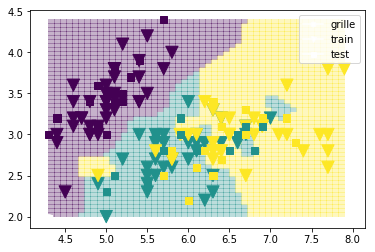

In [7]:
# utiliser Bayes classier avec noyau de Parzen
train_cols = [0,1]
# On cree un modele par classe (par maximum de vraissemblance)
pmodel_classe1=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe2=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe3=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe1.train(iris_train1[:,train_cols])
pmodel_classe2.train(iris_train2[:,train_cols])
pmodel_classe3.train(iris_train3[:,train_cols])

# On cree une liste de tous nos modeles
# On fait la meme chose pour les priors
# Les priors sont calcules ici de facon exact car on connait le nombre 
# de representants par classes. Un fois que vous aurez cree un
# ensemble de train/test, il va faloir les calculer de facon exacte
pmodele_parzen=[pmodel_classe1,pmodel_classe2,pmodel_classe3]
priors=[0.3333,0.3333,0.3333]

sigma=0.1

# On cree notre classifieur avec notre liste de modeles gaussien et nos priors
pclassifieur=classif_bayes_parzen(pmodele_parzen,priors,sigma)

#on peut maintenant calculer les logs-probabilites selon nos modeles
log_prob_train_p=pclassifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test_p=pclassifieur.compute_predictions(iris_validation[:, train_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classesPred_train_p = log_prob_train_p.argmax(1)+1
classesPred_test_p = log_prob_test_p.argmax(1)+1

gridplot(pclassifieur,
         iris_train[:, train_cols + [-1]],
         iris_validation[:, train_cols + [-1]],
         n_points=50)

Sigma= 0.05
Taux d'erreur (entrainement) 5.71%
Taux d'erreur (test) 31.11%


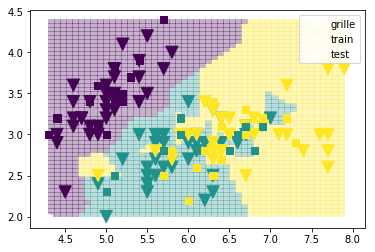

Sigma= 0.2
Taux d'erreur (entrainement) 12.38%
Taux d'erreur (test) 26.67%


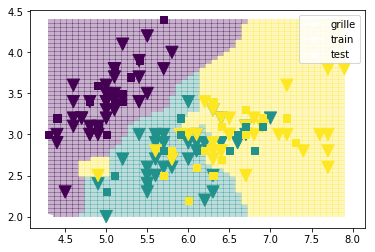

Sigma= 0.5
Taux d'erreur (entrainement) 13.33%
Taux d'erreur (test) 24.44%


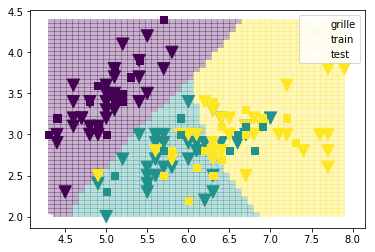

Sigma= 1
Taux d'erreur (entrainement) 17.14%
Taux d'erreur (test) 26.67%


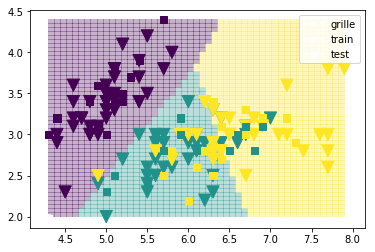

In [8]:
# utilise classif_parzen_a_noyau_gauss_mv_isotropique, 
# il marche tout seul, pas besoin de classifieur bayes
train_cols = [0,1]

# On cree un modele par classe (par maximum de vraissemblance)
model_classe1=classif_parzen_a_noyau_gauss_mv_isotropique(2,0.05)
model_classe1.train(iris_train[:,train_cols],iris_train[:,-1])

model_classe2=classif_parzen_a_noyau_gauss_mv_isotropique(2,0.2)
model_classe2.train(iris_train[:,train_cols],iris_train[:,-1])

model_classe3=classif_parzen_a_noyau_gauss_mv_isotropique(2,0.5)
model_classe3.train(iris_train[:,train_cols],iris_train[:,-1])
                    
model_classe4=classif_parzen_a_noyau_gauss_mv_isotropique(2,1)
model_classe4.train(iris_train[:,train_cols],iris_train[:,-1])
                    
#on peut maintenant calculer les logs-probabilites selon nos modeles
prob_train1=model_classe1.compute_predictions(iris_train[:,train_cols])
prob_test1=model_classe1.compute_predictions(iris_validation[:,train_cols])

prob_train2=model_classe2.compute_predictions(iris_train[:,train_cols])
prob_test2=model_classe2.compute_predictions(iris_validation[:,train_cols])

prob_train3=model_classe3.compute_predictions(iris_train[:,train_cols])
prob_test3=model_classe3.compute_predictions(iris_validation[:,train_cols])

prob_train4=model_classe4.compute_predictions(iris_train[:,train_cols])
prob_test4=model_classe4.compute_predictions(iris_validation[:,train_cols])

# il reste maintenant a calculer le maximum par classe pour la classification
classesPred_train1 = prob_train1.argmax(1)+1
classesPred_test1 = prob_test1.argmax(1)+1

classesPred_train2 = prob_train2.argmax(1)+1
classesPred_test2 = prob_test2.argmax(1)+1

classesPred_train3 = prob_train3.argmax(1)+1
classesPred_test3 = prob_test3.argmax(1)+1

classesPred_train4 = prob_train4.argmax(1)+1
classesPred_test4 = prob_test4.argmax(1)+1

print 'Sigma=',model_classe1.sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train1==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test1==iris_validation[:,-1]).mean())*100.0)

gridplot(model_classe1,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

print 'Sigma=',model_classe2.sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train2==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test2==iris_validation[:,-1]).mean())*100.0)

gridplot(model_classe2,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

print 'Sigma=',model_classe3.sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train3==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test3==iris_validation[:,-1]).mean())*100.0)


gridplot(model_classe3,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

print 'Sigma=',model_classe4.sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train4==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test4==iris_validation[:,-1]).mean())*100.0)

gridplot(model_classe4,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)



/Users/louis/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Sigma= 0.05
Taux d'erreur (entrainement) 5.71%
Taux d'erreur (test) 31.11%


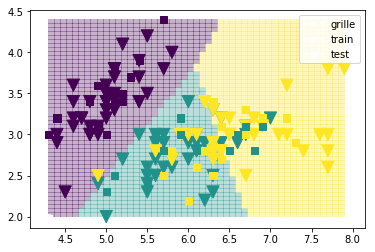

Sigma= 0.2
Taux d'erreur (entrainement) 14.29%
Taux d'erreur (test) 22.22%


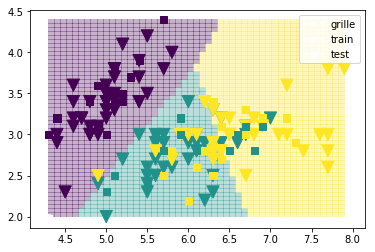

Sigma= 0.5
Taux d'erreur (entrainement) 15.24%
Taux d'erreur (test) 24.44%


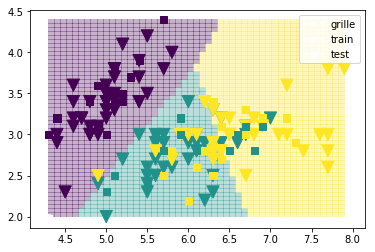

Sigma= 1
Taux d'erreur (entrainement) 20.95%
Taux d'erreur (test) 26.67%


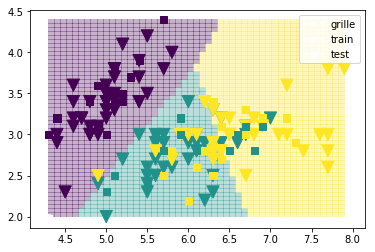

In [9]:
# utiliser Bayes classier avec noyau de Parzen, pour des sigma(hyper parameter) differents
train_cols = [0,1]
# On cree un modele par classe (par maximum de vraissemblance)
pmodel_classe1=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe2=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe3=estimateur_parzen_a_noyau_gauss_pour_bayes(len(train_cols))
pmodel_classe1.train(iris_train1[:,train_cols])
pmodel_classe2.train(iris_train2[:,train_cols])
pmodel_classe3.train(iris_train3[:,train_cols])

# On cree une liste de tous nos modeles
# On fait la meme chose pour les priors
# Les priors sont calcules ici de facon exact car on connait le nombre 
# de representants par classes. Un fois que vous aurez cree un
# ensemble de train/test, il va faloir les calculer de facon exacte
pmodele_parzen=[pmodel_classe1,pmodel_classe2,pmodel_classe3]
priors=[0.3333,0.3333,0.3333]

sigma=0.05
pclassifieur=classif_bayes_parzen(pmodele_parzen,priors,sigma)
log_prob_train_p=pclassifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test_p=pclassifieur.compute_predictions(iris_validation[:, train_cols])
classesPred_train_p = log_prob_train_p.argmax(1)+1
classesPred_test_p = log_prob_test_p.argmax(1)+1
print 'Sigma=',sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train_p==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test_p==iris_validation[:,-1]).mean())*100.0)
gridplot(model_classe4,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

sigma=0.2
pclassifieur=classif_bayes_parzen(pmodele_parzen,priors,sigma)
log_prob_train_p=pclassifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test_p=pclassifieur.compute_predictions(iris_validation[:, train_cols])
classesPred_train_p = log_prob_train_p.argmax(1)+1
classesPred_test_p = log_prob_test_p.argmax(1)+1
print 'Sigma=',sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train_p==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test_p==iris_validation[:,-1]).mean())*100.0)
gridplot(model_classe4,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

sigma=0.5
pclassifieur=classif_bayes_parzen(pmodele_parzen,priors,sigma)
log_prob_train_p=pclassifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test_p=pclassifieur.compute_predictions(iris_validation[:, train_cols])
classesPred_train_p = log_prob_train_p.argmax(1)+1
classesPred_test_p = log_prob_test_p.argmax(1)+1
print 'Sigma=',sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train_p==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test_p==iris_validation[:,-1]).mean())*100.0)
gridplot(model_classe4,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

sigma=1
pclassifieur=classif_bayes_parzen(pmodele_parzen,priors,sigma)
log_prob_train_p=pclassifieur.compute_predictions(iris_train[:, train_cols])
log_prob_test_p=pclassifieur.compute_predictions(iris_validation[:, train_cols])
classesPred_train_p = log_prob_train_p.argmax(1)+1
classesPred_test_p = log_prob_test_p.argmax(1)+1
print 'Sigma=',sigma
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train_p==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test_p==iris_validation[:,-1]).mean())*100.0)
gridplot(model_classe4,
        iris_train[:, train_cols + [-1]],
        iris_validation[:, train_cols + [-1]],
        n_points=50)

c)Training curves for d = 2. Compute the training error and validation error both on the training and validation sets, as a function of the hyperparameter(use 100 different values for $\sigma$ so that you
can plot a curve. Indicate the best value for $\sigma$.

Dimension= 2  100 sigma 


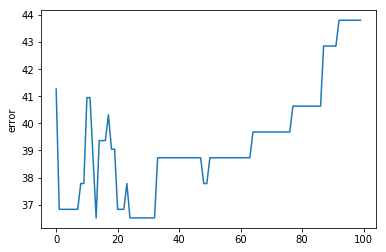

In [10]:
# car classif_parzen_a_noyau_gauss_mv_isotropique et classif_bayes_parzen ont la meme resultat,
# pour suivant, on utilise classif_parzen_a_noyau_gauss_mv_isotropique, c'est plus simple
import matplotlib.pyplot as plt
train_cols = [0,1]
error = np.zeros(100)
print 'Dimension=', len(train_cols),' 100 sigma '
for i in range(100):
    sigma=(i+1)*0.01
    model_classe = classif_parzen_a_noyau_gauss_mv_isotropique(len(train_cols),sigma)
    model_classe.train(iris_train[:,train_cols],iris_train[:,-1])
    
    prob_train=model_classe.compute_predictions(iris_train[:,train_cols])    
    prob_test=model_classe.compute_predictions(iris_validation[:,train_cols])
    
    classesPred_train = prob_train.argmax(1)+1
    classesPred_test = prob_test.argmax(1)+1
    error[i] = ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0) + ((1-(classesPred_test==iris_validation[:,-1]).mean())*100.0)
plt.plot(error)
plt.ylabel('error')
plt.show()

d)Training curves for d = 4. We will now use all features. Compute the training error and validation error both on the training and validation sets, as a function of the hyperparameter $\sigma $(use 100 different values for $\sigma $ so that you can plot a curve. Indicate the
best value for $\sigma $.

Dimension= 4  sigma= 0.2
Taux d'erreur (entrainement) 0.00%
Taux d'erreur (test) 4.44%
Dimension= 4  100 sigma 


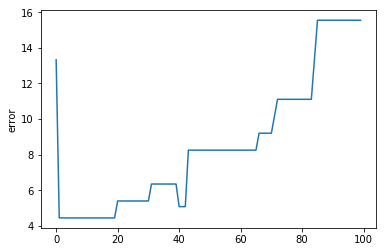

In [11]:
train_cols = [0,1,2,3]
model_classe = classif_parzen_a_noyau_gauss_mv_isotropique(len(train_cols),0.2)
model_classe.train(iris_train[:,train_cols],iris_train[:,-1])
log_prob_train=model_classe.compute_predictions(iris_train[:,train_cols])
log_prob_test=model_classe.compute_predictions(iris_validation[:,train_cols])
classesPred_train = log_prob_train.argmax(1)+1
classesPred_test = log_prob_test.argmax(1)+1
print 'Dimension=', len(train_cols),' sigma=',0.2
print "Taux d'erreur (entrainement) %.2f%%" % ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0)
print "Taux d'erreur (test) %.2f%%" % ((1-(classesPred_test==iris_validation[:,-1]).mean())*100.0)
error = np.zeros(100)
print 'Dimension=', len(train_cols),' 100 sigma '
for i in range(100):
    sigma=(i+1)*0.02
    model_classe = classif_parzen_a_noyau_gauss_mv_isotropique(len(train_cols),sigma)
    model_classe.train(iris_train[:,train_cols],iris_train[:,-1])
    log_prob_train=model_classe.compute_predictions(iris_train[:,train_cols])
    log_prob_test=model_classe.compute_predictions(iris_validation[:,train_cols])
    classesPred_train = log_prob_train.argmax(1)+1
    classesPred_test = log_prob_test.argmax(1)+1
    error[i] = ((1-(classesPred_train==iris_train[:,-1]).mean())*100.0) + ((1-(classesPred_test==iris_validation[:,-1]).mean())*100.0)
plt.plot(error)
plt.ylabel('error')
plt.show()

4.Using these experiments, for the Iris classication task (and for this particular split train/validation), indicate the best algorithm between Bayes classier with diagonal Gaussian density functions and Parzen windows and the best correponding hyperparameters : dimension (2 ou 4) and $\sigma $ (if relevant). Specify the train error and validation error.

Response: 
Selon les resultats, quand dimension=2, le classifieur de Parzen avec sigma(hyper parameter)=0.5 est meilleur que le classifieur de gaussien diagonal (le taux d'errors 24.44% < 26.67%), quand dimension=4, le classifieur de Parzen avec sigma(hyper parameter)=0.2 est aussi meilleur que le classifieur de gaussien diagonal (le taux d'errors 4.44% < 6.67%). De plus, avec le classifieur de Parzen on peut choisir le hyper parameter, c'est plus capable. 